In [1]:
from IPython.display import display
import ipywidgets as widgets

import numpy as np
import verde as vd
import harmonica as hm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
easting = vd.line_coordinates(-100, 100, size=201)
northing = np.zeros_like(easting)
upward = np.zeros_like(easting)

coordinates = (easting, northing, upward)

In [3]:
prism = [-20, 20, -20, 20, -60, -20]

In [4]:
def prism_to_rectangle(prism, **kwargs):
    """
    Generate a matplotlib rectangle through a vertical slice of a prism
    """
    from matplotlib.patches import Rectangle
    west, east, _, _, bottom, top = prism[:]
    anchor_point = (west, bottom)
    width = east - west
    height = top - bottom
    return Rectangle(xy=anchor_point, width=width, height=height, **kwargs)

In [5]:
def forward(coordinates, prism, density, density_range=(-400, 400)):
    """
    """
    import matplotlib
    # Forward model
    gravity = hm.prism_gravity(coordinates, prism, density, field="g_z")

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    cmap = matplotlib.colormaps["RdBu_r"]
    norm = matplotlib.colors.Normalize(vmin=density_range[0], vmax=density_range[1])
    
    # Plot rectangle and observation points
    rectangle = prism_to_rectangle(prism, facecolor=cmap(norm(density)))
    ax.add_patch(rectangle)
    
    # Set aspect of the main axes.
    ax.set_aspect("equal")
    
    # set ylims
    ax.set_ylim(-100, 0)
    
    # create new axes on the right and on the top of the current axes
    divider = make_axes_locatable(ax)
    
    # below height and pad are in inches
    ax_gravity = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
    
    # hide ticks
    ax_gravity.xaxis.set_tick_params(labelbottom=False)
    
    ax_gravity.plot(easting, gravity)
    ax_gravity.set_ylabel("Gravity [mGal]")
    ax_gravity.set_ylim(-0.15, 0.15)
    
    ax.set_xlabel("Easting [m]")
    ax.set_ylabel("Depth [m]")

    plt.colorbar(
        matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
        ax=ax,
        orientation="horizontal",
        shrink=0.7,
        label="Density [kg/m3]",
    )
    
    plt.show()

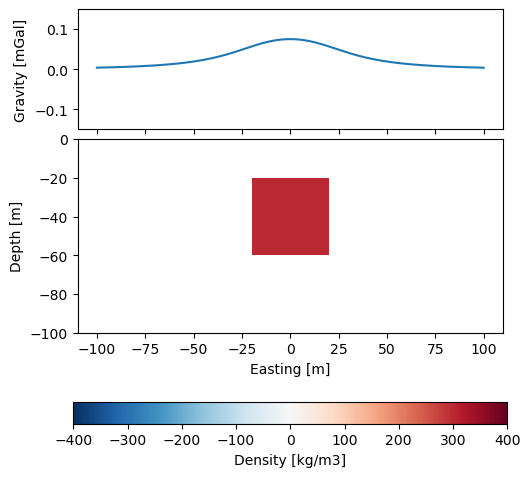

In [6]:
forward(coordinates, prism, 300)

In [7]:
slider = widgets.FloatSlider(value=0, min=-400, max=400, step=10)

def f(density):
    forward(coordinates, prism, density)

display(slider)
widgets.interactive_output(f, {"density": slider})

FloatSlider(value=0.0, max=400.0, min=-400.0, step=10.0)

Output()